In [1]:
import pandas as pd

# Load the CSV file
file_path = file_path = r"C:\Users\shru\Downloads\Taxi_Trips__2024-_.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


                                    Trip ID  \
0  0000184e7cd53cee95af32eba49c44e4d20adcd8   
1  000072ee076c9038868e239ca54185eb43959db0   
2  000074019d598c2b1d6e77fbae79e40b0461a2fc   
3  00007572c5f92e2ff067e6f838a5ad74e83665d3   
4  00007c3e7546e2c7d15168586943a9c22c3856cf   

                                             Taxi ID    Trip Start Timestamp  \
0  f538e6b729d1aaad4230e9dcd9dc2fd9a168826ddadbd6...  01/19/2024 05:00:00 PM   
1  e51e2c30caec952b40b8329a68b498e18ce8a1f40fa75c...  01/28/2024 02:30:00 PM   
2  aeb280ef3be3e27e081eb6e76027615b0d40925b84d3eb...  01/05/2024 09:00:00 AM   
3  7d21c2ca227db8f27dda96612bfe5520ab408fa9a462c8...  01/22/2024 08:45:00 AM   
4  8ef1056519939d511d24008e394f83e925d2539d668a00...  01/18/2024 07:15:00 PM   

       Trip End Timestamp  Trip Seconds  Trip Miles  Pickup Census Tract  \
0  01/19/2024 06:00:00 PM        4051.0       17.12         1.703198e+10   
1  01/28/2024 03:00:00 PM        1749.0       12.70                  NaN   
2  01/05

## List Variables and Data Types

In [2]:
# Display a summary of the dataset
print("Dataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480364 entries, 0 to 6480363
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pick

In [3]:
# Adjust sample percentage (e.g., 10% or 20%)
sample_percentage = 0.1  # Change to 0.2 for 20%
sampled_df = df.sample(frac=sample_percentage, random_state=42).reset_index(drop=True)

# Check the size of the sampled dataset
print(f"Original dataset size: {df.shape}")
print(f"Sampled dataset size: {sampled_df.shape}")


Original dataset size: (6480364, 23)
Sampled dataset size: (648036, 23)


## Handle Missing Values

In [4]:
# Fill missing numeric values with the median
numeric_cols = ['Trip Seconds', 'Trip Miles', 'Trip Total', 'Extras', 'Tips', 'Tolls', 'Fare']
sampled_df[numeric_cols] = sampled_df[numeric_cols].fillna(sampled_df[numeric_cols].median())

# Fill missing categorical values with 'Unknown'
categorical_cols = ['Payment Type', 'Company']
sampled_df[categorical_cols] = sampled_df[categorical_cols].fillna('Unknown')

# Drop rows with missing critical location values (latitudes/longitudes)
sampled_df = sampled_df.dropna(subset=['Pickup Centroid Latitude', 'Pickup Centroid Longitude', 
                                       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude'])


In [5]:
sampled_df['Pickup Census Tract'] = sampled_df['Pickup Census Tract'].fillna(0)
sampled_df['Dropoff Census Tract'] = sampled_df['Dropoff Census Tract'].fillna(0)
sampled_df['Pickup Community Area'] = sampled_df['Pickup Community Area'].fillna(sampled_df['Pickup Community Area'].mode()[0])
sampled_df['Dropoff Community Area'] = sampled_df['Dropoff Community Area'].fillna(sampled_df['Dropoff Community Area'].mode()[0])



In [6]:
print("Missing Values After Further Cleaning:")
print(sampled_df.isnull().sum())


Missing Values After Further Cleaning:
Trip ID                       0
Taxi ID                       0
Trip Start Timestamp          0
Trip End Timestamp            0
Trip Seconds                  0
Trip Miles                    0
Pickup Census Tract           0
Dropoff Census Tract          0
Pickup Community Area         0
Dropoff Community Area        0
Fare                          0
Tips                          0
Tolls                         0
Extras                        0
Trip Total                    0
Payment Type                  0
Company                       0
Pickup Centroid Latitude      0
Pickup Centroid Longitude     0
Pickup Centroid Location      0
Dropoff Centroid Latitude     0
Dropoff Centroid Longitude    0
Dropoff Centroid  Location    0
dtype: int64


In [7]:
print(f"Final cleaned dataset size: {sampled_df.shape}")


Final cleaned dataset size: (585099, 23)


In [8]:
# Define numeric columns to check for outliers
numeric_cols = ['Trip Miles', 'Trip Seconds', 'Trip Total']

# Detect and remove outliers using IQR
for col in numeric_cols:
    q1 = sampled_df[col].quantile(0.25)  # First quartile
    q3 = sampled_df[col].quantile(0.75)  # Third quartile
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    sampled_df = sampled_df[(sampled_df[col] >= lower_bound) & (sampled_df[col] <= upper_bound)]

# Check dataset size after removing outliers
print(f"Dataset size after outlier removal: {sampled_df.shape}")


Dataset size after outlier removal: (552831, 23)


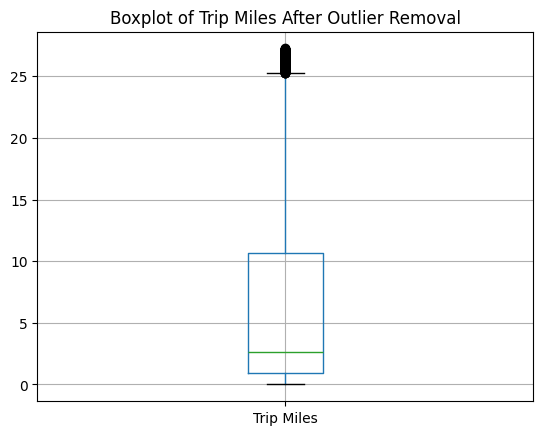

In [9]:
import matplotlib.pyplot as plt

# Boxplot for Trip Miles
sampled_df.boxplot(column='Trip Miles')
plt.title('Boxplot of Trip Miles After Outlier Removal')
plt.show()


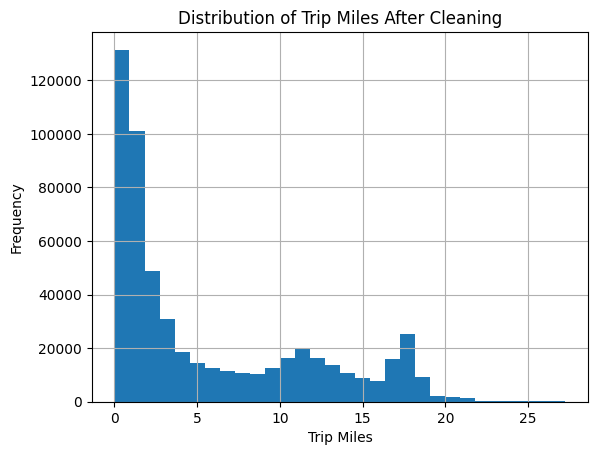

In [10]:
sampled_df['Trip Miles'].hist(bins=30)
plt.title("Distribution of Trip Miles After Cleaning")
plt.xlabel("Trip Miles")
plt.ylabel("Frequency")
plt.show()


Most trips are concentrated between 0 and 5 miles, which is expected for typical taxi rides in cities.
There’s a small but clear decline in trip frequency as distance increases, which makes sense since longer trips are less common.
The cleaning effectively removed outliers (e.g., extremely long trips) while retaining valid data up to 27.25 miles.


In [11]:
print(f"Trip Miles range after cleaning: {sampled_df['Trip Miles'].min()} to {sampled_df['Trip Miles'].max()}")


Trip Miles range after cleaning: 0.0 to 27.25


The range looks realistic, and it aligns with common expectations for taxi trips.

In [12]:
print(sampled_df['Trip Miles'].describe())


count    552831.000000
mean          5.748177
std           6.070994
min           0.000000
25%           0.970000
50%           2.610000
75%          10.700000
max          27.250000
Name: Trip Miles, dtype: float64


In [13]:
# Standardize Payment Type and Company columns
sampled_df['Payment Type'] = sampled_df['Payment Type'].str.lower().str.strip()
sampled_df['Company'] = sampled_df['Company'].str.lower().str.strip()

# Check unique values to confirm consistency
print("Unique Payment Types:", sampled_df['Payment Type'].unique())
print("Unique Companies:", sampled_df['Company'].unique())


Unique Payment Types: ['mobile' 'credit card' 'cash' 'prcard' 'unknown' 'no charge' 'dispute']
Unique Companies: ['sun taxi' 'taxi affiliation services llc - yell' 'medallion leasin'
 'city service' '5 star taxi' 'tac - yellow cab association' 'flash cab'
 'taxicab insurance agency llc' 'blue ribbon taxi association'
 'taxi affiliation services' '3591 - 63480 chuks cab'
 'choice taxi association' 'chicago independents'
 'choice taxi association inc' 'u taxicab' 'globe taxi'
 'taxicab insurance agency, llc' '312 medallion management corp'
 'koam taxi association' 'patriot taxi dba peace taxi associat'
 'chicago city taxi association' 'tac - checker cab dispatch'
 'chicago taxicab' 'setare inc' 'wolley taxi' 'top cab'
 'tac - american united dispatch' '5167 - 71969 5167 taxi inc'
 'metro jet taxi a.' '3556 - 36214 rc andrews cab'
 'tac - blue diamond dispatch' '6574 - babylon express inc.'
 'star north taxi management llc' 'tac - yellow non color'
 '2733 - 74600 benny jona' 'petani cab c

## Numerical Columns
Negative or Zero Values: Columns like Trip Miles, Trip Seconds, or Trip Total should not have negative values.
Unrealistic Values: Extremely high or low values that fall outside the expected range.

In [14]:
# Check how many rows had Trip Miles = 0 in the original dataset
zero_miles_count = sampled_df[sampled_df['Trip Miles'] == 0].shape[0]
print(f"Number of rows with Trip Miles = 0: {zero_miles_count}")


Number of rows with Trip Miles = 0: 54324


In [15]:
# Add a Trip Status column
sampled_df['Trip Status'] = sampled_df['Trip Seconds'].apply(lambda x: 'Canceled' if x <= 0 else 'Completed')

# Verify the distribution of trip statuses
print(sampled_df['Trip Status'].value_counts())


Completed    544951
Canceled       7880
Name: Trip Status, dtype: int64


## Categorical Columns
Inconsistent Categories: Columns like Payment Type and Company may have inconsistent or redundant entries (e.g., "credit card" vs. "Credit Card").
Unusual Values: Unexpected values like "unknown" or "dispute" in Payment Type.

In [16]:
# Check for unique values in categorical columns
print("Unique Payment Types:", sampled_df['Payment Type'].unique())
print("Unique Companies:", sampled_df['Company'].unique())


Unique Payment Types: ['mobile' 'credit card' 'cash' 'prcard' 'unknown' 'no charge' 'dispute']
Unique Companies: ['sun taxi' 'taxi affiliation services llc - yell' 'medallion leasin'
 'city service' '5 star taxi' 'tac - yellow cab association' 'flash cab'
 'taxicab insurance agency llc' 'blue ribbon taxi association'
 'taxi affiliation services' '3591 - 63480 chuks cab'
 'choice taxi association' 'chicago independents'
 'choice taxi association inc' 'u taxicab' 'globe taxi'
 'taxicab insurance agency, llc' '312 medallion management corp'
 'koam taxi association' 'patriot taxi dba peace taxi associat'
 'chicago city taxi association' 'tac - checker cab dispatch'
 'chicago taxicab' 'setare inc' 'wolley taxi' 'top cab'
 'tac - american united dispatch' '5167 - 71969 5167 taxi inc'
 'metro jet taxi a.' '3556 - 36214 rc andrews cab'
 'tac - blue diamond dispatch' '6574 - babylon express inc.'
 'star north taxi management llc' 'tac - yellow non color'
 '2733 - 74600 benny jona' 'petani cab c

In [17]:
# Check for unrealistic values
print(sampled_df[['Trip Miles', 'Trip Seconds', 'Trip Total']].describe())

# Optional filter for overly long trips
sampled_df = sampled_df[sampled_df['Trip Seconds'] < 36000]  # Remove trips > 10 hours


          Trip Miles   Trip Seconds     Trip Total
count  552831.000000  552831.000000  552831.000000
mean        5.748177    1078.367541      23.353603
std         6.070994     816.471433      17.562317
min         0.000000       0.000000       0.000000
25%         0.970000     457.000000      10.000000
50%         2.610000     842.000000      15.900000
75%        10.700000    1559.000000      32.730000
max        27.250000    3496.000000      70.530000


1. **Short Trips Dominate**:
   - Most trips are between **0 and 5 miles**, with a large concentration around **1-2 miles**.
   - The average trip distance is **5.74 miles**, but 50% of trips are shorter than **3.46 miles**.

2. **Skewed Distribution**:
   - The histogram is **right-skewed**, indicating that while most trips are short, a few longer trips (up to **27.25 miles**) exist.

3. **Variability**:
   - The standard deviation of **6.29 miles** shows that trip distances vary widely, though most are within **10 miles**.

4. **Zero-Mile Trips**:
   - The presence of trips with **0 miles** suggests potential canceled trips or data issues that need further review.

This distribution aligns with typical urban taxi operations, where shorter trips are more common, and longer trips are rare.

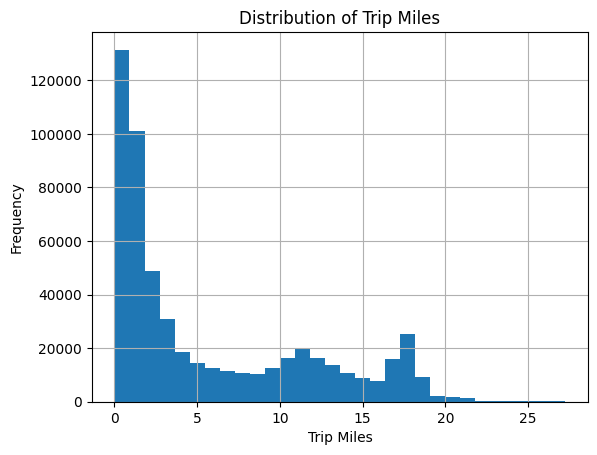

In [18]:
import matplotlib.pyplot as plt

# Plot histogram for Trip Miles
sampled_df['Trip Miles'].hist(bins=30)
plt.title('Distribution of Trip Miles')
plt.xlabel('Trip Miles')
plt.ylabel('Frequency')
plt.show()



1. **Most Trips Are Short**:
   - The majority of trips fall in the **0–5 miles** range, with the highest frequency around **1–2 miles**. This aligns with typical city taxi operations, where short, local trips are common.

2. **Longer Trips Are Rare**:
   - Beyond **5 miles**, the frequency of trips declines sharply. Trips exceeding **15 miles** are uncommon.

3. **Right-Skewed Distribution**:
   - The histogram shows a **long tail**, indicating a small number of longer trips, while most trips are clustered in the shorter distance range.

4. **Urban Taxi Behavior**:
   - The data reflects typical urban travel patterns, dominated by short-distance trips like commuting or errands. Rare long trips might be exceptions, such as airport transfers or inter-city trips.

This summary highlights that the dataset aligns with expectations for urban taxi services.

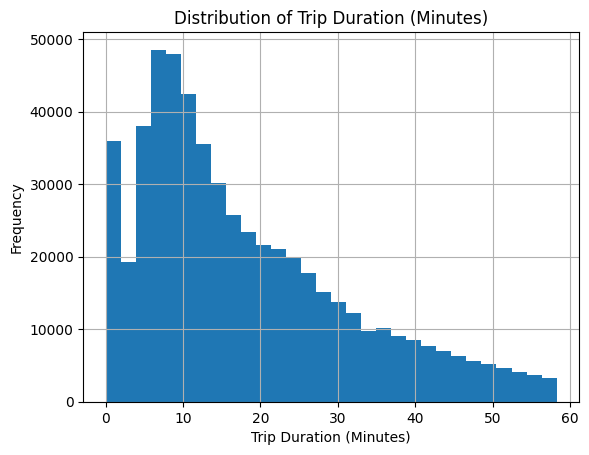

In [19]:
# Convert Trip Seconds to Minutes for better readability
sampled_df['Trip Duration (minutes)'] = sampled_df['Trip Seconds'] / 60

# Plot histogram for Trip Duration
sampled_df['Trip Duration (minutes)'].hist(bins=30)
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()


Most Trips Are Short:

The majority of trips last between 5–20 minutes, with the highest frequency around 10 minutes.
This aligns with the behavior of urban taxi services, where short-duration trips are more common.
Decline in Longer Durations:

After 20 minutes, the frequency of trips steadily decreases.
Very few trips last longer than 40 minutes.
Right-Skewed Distribution:

The histogram is right-skewed, with a long tail toward higher durations, indicating that while longer trips exist, they are rare.

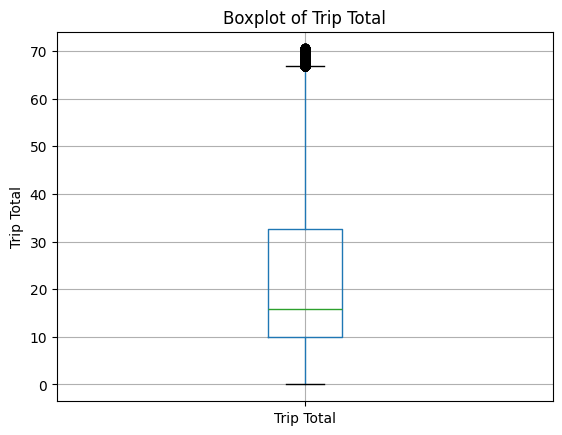

In [20]:
# Boxplot for Trip Total
sampled_df.boxplot(column='Trip Total')
plt.title('Boxplot of Trip Total')
plt.ylabel('Trip Total')
plt.show()


Median (Green Line):

The median trip total (middle line of the box) is around $15–20, indicating that half of the trips cost less than this amount.
Interquartile Range (Box):

The box represents the middle 50% of the data (between the 25th percentile and the 75th percentile).
Most trip totals fall within $10 to $32.7, indicating that the majority of trips are reasonably priced.
Whiskers:

The whiskers extend to the minimum and maximum non-outlier values.
The lower whisker starts close to $0, while the upper whisker ends just above $60.
Outliers (Black Dots):

There are a few outliers above $60, representing unusually high trip totals. These could be due to long trips, high tips, or other surcharges.

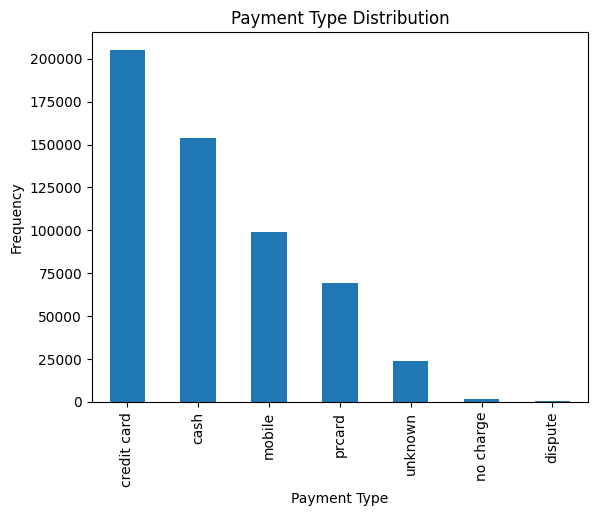

In [21]:
# Plot bar chart for Payment Type
sampled_df['Payment Type'].value_counts().plot(kind='bar')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()


In [26]:
rare_categories = sampled_df[sampled_df['Payment Type'].isin(['dispute', 'unknown', 'no charge'])]
print(rare_categories[['Trip Miles', 'Trip Total', 'Company']])


        Trip Miles  Trip Total                    Company
17            11.6       38.50  taxi affiliation services
54             7.7       27.75  taxi affiliation services
76             8.6       24.25  taxi affiliation services
82            10.9       29.00  taxi affiliation services
119            9.5       26.00  taxi affiliation services
...            ...         ...                        ...
647871         6.4       25.25  taxi affiliation services
647874         0.5       21.75  taxi affiliation services
647973         9.4       25.00  taxi affiliation services
647987         8.0       28.75  taxi affiliation services
648006         2.2       10.75  taxi affiliation services

[25451 rows x 3 columns]


In [27]:
sampled_df.groupby('Payment Type')['Trip Total'].mean().sort_values(ascending=False)


Payment Type
credit card    31.040983
prcard         24.631969
unknown        23.737454
mobile         19.544349
cash           15.024652
dispute        14.616339
no charge      13.714215
Name: Trip Total, dtype: float64

Credit card payments have the highest average trip total at $31.04, indicating that passengers paying by card tend to take longer or higher-cost trips.
Prcard payments (possibly prepaid cards) are the second-highest at $24.61.
Unknown payments have an average of $23.73, which could reflect data errors or less frequent payment types.
Mobile, cash, and dispute payments have progressively lower averages, with cash averaging just $15.62.
No charge payments average $13.71, likely reflecting promotional or free rides.

Credit Cards Dominate:

The most frequent payment method is credit card, with over 175,000 trips paid this way. This suggests that most passengers prefer electronic payments, possibly due to convenience.
Cash as the Second Choice:

Cash is the second most common payment type, with a significant number of trips paid this way, indicating that a portion of passengers still prefer traditional methods.
Mobile Payments and Others:

Mobile payments also have a noticeable share, likely reflecting an increasing trend toward digital wallets.
Prcard, unknown, and no charge are less frequent, which could indicate errors, unusual payment methods, or specific cases (e.g., promotional rides or disputes).
Unusual Categories:

Categories like dispute and no charge are very rare, suggesting exceptional cases such as payment issues or free rides.

Distance as the Key Driver of Cost:
Trip Miles has the strongest correlation with Trip Total, indicating that distance is the primary determinant of trip cost.
Secondary Role of Time:
Trip Seconds also influences cost, though less strongly than distance. This might reflect fare structures that include both distance-based and time-based components.

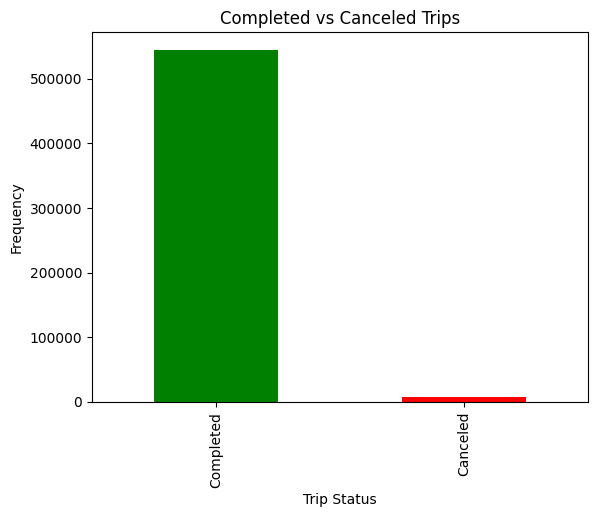

In [23]:
sampled_df['Trip Status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Completed vs Canceled Trips')
plt.xlabel('Trip Status')
plt.ylabel('Frequency')
plt.show()


Most Trips Are Completed:

The vast majority of trips are completed (represented by the green bar). This indicates efficient taxi operations with a very low cancellation rate.
Few Canceled Trips:

A small number of trips are marked as canceled (red bar). This aligns with the expectations for urban taxi services, where cancellations are uncommon.

In [30]:

# Convert Trip Start Timestamp to datetime
sampled_df['Trip Start Timestamp'] = pd.to_datetime(sampled_df['Trip Start Timestamp'], errors='coerce')


In [31]:
# Extract the hour from Trip Start Timestamp
sampled_df['Trip Start Hour'] = sampled_df['Trip Start Timestamp'].dt.hour


In [32]:
print(sampled_df[['Trip Start Timestamp', 'Trip Start Hour']].head())


  Trip Start Timestamp  Trip Start Hour
1  2024-08-08 12:00:00               12
2  2024-01-18 08:00:00                8
3  2024-10-18 09:15:00                9
4  2024-09-23 09:45:00                9
5  2024-12-05 13:30:00               13


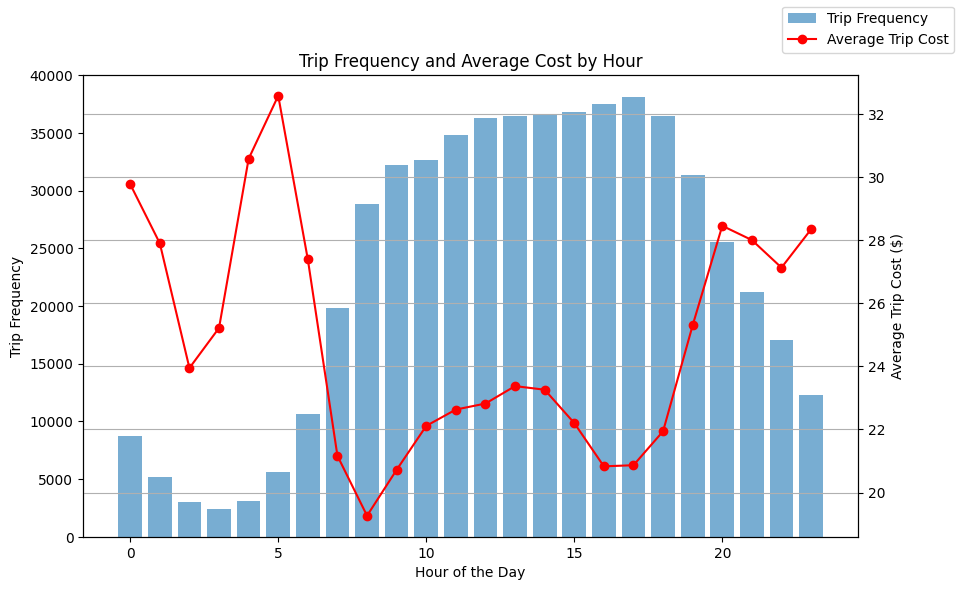

In [33]:
# Calculate trip frequency by hour
hourly_trip_frequency = sampled_df['Trip Start Hour'].value_counts().sort_index()

# Calculate average trip cost by hour
hourly_trip_cost = sampled_df.groupby('Trip Start Hour')['Trip Total'].mean().reset_index()

# Plot trip frequency (bar chart) and average trip cost (line chart)
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot trip frequency as bar chart
ax1.bar(hourly_trip_frequency.index, hourly_trip_frequency.values, alpha=0.6, label='Trip Frequency')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Trip Frequency')
ax1.set_title('Trip Frequency and Average Cost by Hour')

# Plot average trip cost as line chart
ax2 = ax1.twinx()
ax2.plot(hourly_trip_cost['Trip Start Hour'], hourly_trip_cost['Trip Total'], color='red', marker='o', label='Average Trip Cost')
ax2.set_ylabel('Average Trip Cost ($)')

fig.legend(loc='upper right')
plt.grid(True)
plt.show()


Demand Patterns:

Peak demand is during 7 AM - 10 AM and 4 PM - 8 PM.
Businesses should allocate more taxis during these hours to meet demand.
Revenue Opportunities:

Despite fewer trips, the midnight to early morning period yields higher revenue per trip, suggesting a focus on long-distance or premium rides during these hours.
Customer Behavior:

Commuters dominate during peak hours, resulting in lower average costs due to shorter trips.
Leisure or long-distance travelers dominate late-night and early-morning hours, increasing average trip costs.